In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

2. *Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).

Вначале сгенерируем три облака точек с помощью инструментов `sklearn`.

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, n_features=2, random_state=1)

Изобразим точки на графике.

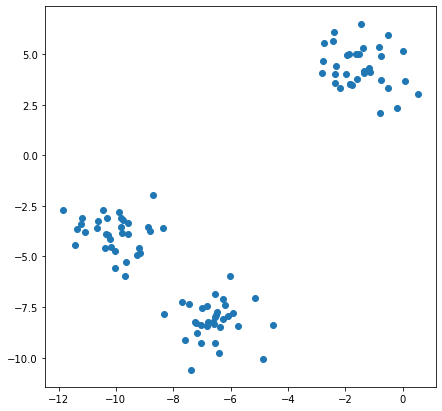

In [3]:
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1]);

В качестве метрики расстояния будем использовать евклидово расстояние, функция для которого была написана ранее. В качестве центроидов выберем первые k элементов датасета. Реализуем основной цикл алгоритма.

In [4]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
        
    distance = np.sum(np.square(x1 - x2))

    return np.sqrt(distance)

In [5]:
def kmeans(data, k, max_iterations, min_distance):
    # Создадим словарь для кластеризации
    clusters = {i: [] for i in range(k)}
    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        # кластеризуем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            cluster = distances.index(min(distances))
            clusters[cluster].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for cluster in clusters:
            centroids[cluster] = np.mean(clusters[cluster], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.linalg.norm(centroids[centroid] - old_centroids[centroid], ord=2) > min_distance:
                optimal = False
                break
        
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
    
    return old_centroids, clusters

Напишем функцию для визуализации кластеров

In [6]:
def visualize(centroids, clusters):
    colors = ['r', 'g', 'b', 'orange', 'y']
    
    plt.figure(figsize=(7,7))
    
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесем объекты раскрашенные по классам
    for cluster_item in clusters:
        for x in clusters[cluster_item]:
            plt.scatter(x[0], x[1], color=colors[cluster_item])
            
    plt.show()

In [7]:
# определим максимальное количество итераций
max_iterations = 1

# и минимальное расстояние между центроидами до пересчета и после него, при котором нужно остановить алгоритм
min_distance = 1e-4

# сразу определим известное нам количество кластеров
k = 3

Проверим результат алгоритма после одной итерации

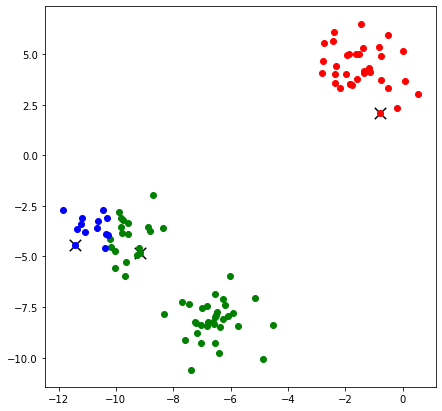

In [8]:
centroids, clusters = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

In [54]:
def mean_square_distance(centroids, clusters):
    mean_cluster_distances = [] # среднее расстояние в кластере
    
    for l in range(len(clusters)):
        cluster_distances = [] # расстояния от объектов в кластере до центроида
        
        for i in enumerate(clusters[l]):
            # квадрат расстояния объекта до центроида
            cluster_distances.append((e_metrics(centroids[l], clusters[l][i[0]])**2)) 
            
        # добавление среднего всех расстояний внутри кластера   
        mean_cluster_distances.append(np.mean(cluster_distances)) 
    # среднее расстояние среди всех кластеров
    mean_square_distance = np.mean(mean_cluster_distances)
    return mean_square_distance
    

In [55]:
mean_square_distance(centroids, clusters)

7.236961727691903

In [70]:
# определим максимальное количество итераций
max_iterations = 1

# и минимальное расстояние между центроидами до пересчета и после него, при котором нужно остановить алгоритм
min_distance = 1e-4

# сразу определим известное нам количество кластеров
k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [71]:
errors = [] # все среднеквадратичные внутрикластерные расстояния

for ks in k:
    centroids, clusters = kmeans(X, ks, max_iterations, min_distance)
    errors.append(mean_square_distance(centroids, clusters))
    


In [72]:
errors

[89.3305051052228,
 9.234636077166346,
 7.236961727691903,
 6.038206839364709,
 3.384452479935734,
 2.169208982952836,
 1.9827333386733326,
 1.8150716915688427,
 1.3924747882909219,
 1.039171722829422]

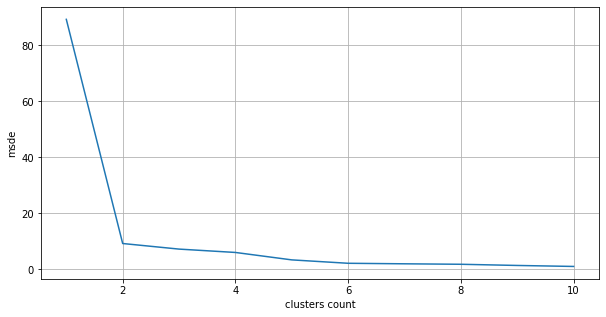

In [77]:
plt.figure(figsize = (10, 5))
plt.xlabel('clusters count')
plt.ylabel('msde')
plt.grid()
plt.plot(k, errors)